# Least-Squares Regression Workbook 
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**

# Example 1
The height of a person vs femur length is given by the following data:

| femur length (cm) | height (cm) |
| :----------------: |:-----------: |
| 40	            | 163|
|41	|165|
|43	|167|
|43	|164|
|44	|168|
|44	|169|
|45	|170|
|45	|167|
|48	|170|
|51	|175|

Let's first get the boiler plate out of the way and import matplotlib and numpy

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
mpl.rcParams['font.family'] = 'fantasy'
import numpy as np


Now place the input data in `numpy` arrays. We can enter these manually or import from a text file.

In [65]:
xi = np.array([40,41,43,43,44,44,45,45,48,51])
yi = np.array([163,165,167,164,168,169,170,167,170,175])

Now plot the data

Text(0.5, 1.0, 'Height vs femur length')

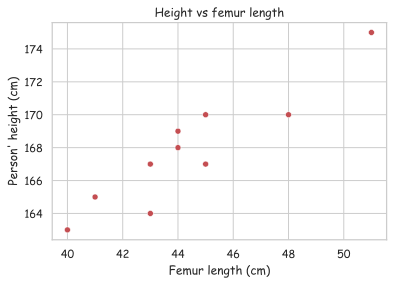

In [66]:
plt.plot(xi,yi,'ro')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')

## Regression to a straight line
Here, we regress the data to a straight line $a_0 + a_1 x$. Recall that, for regression to a straight line, we must solve the following system of equations:
\begin{equation}
\label{eq:regression-line}
\left[
\begin{array}{*{20}{c}}
N& \sum{x_i}\\
\sum{x_i} &\sum{x_i^2}
\end{array}
\right]
\left(
\begin{array}{*{20}{c}}
a_0\\
a_1
\end{array} \right)
= \left( 
\begin{array}{*{20}{c}}
\sum{y_i}\\
\sum {x_i y_i}
\end{array} 
\right)
\end{equation}

first build the coefficient matrix as a list of lists [ [a,b], [c,d]]. We will use `numpy.sum` to compute the various summations in the system \eqref{eq:regression-line}.

In [20]:
N = len(xi)
A = np.array([[N, sum(xi)],
              [sum(xi), sum(xi**2)]])
print(A)

[[   10   444]
 [  444 19806]]


next, construct the right-hand-side using a 1D numpy array

In [21]:
b = np.array([sum(yi), sum(yi*xi)])
print(b)

[ 1678 74596]


now find the solution of $[\mathbf{A}]\mathbf{a} = \mathbf{b}$, where $a = (a_0, a_1)$ are the coefficients of the regressed line. Use `numpy`'s built-in linear solver.

In [22]:
sol = np.linalg.solve(A,b) # Solve the system of equations using Numpy's exact solver
# print the solution. Note that in this case, the solution should contain two values, a0 and a1, respectively.
print(sol)

[123.20779221   1.004329  ]


The variable `sol` contains the solution of the system of equations. It is a list of two entries corresponding to the coefficients $a_0$ and $a_1$ of the regressed line.

We can now plot the line, $a_0 + a_1 x$ that we just fitted into the data

In [23]:
# first get the coefficients a0 and a1 from the variable sol
a0 = sol[0]
a1 = sol[1]

# construct a function f(x) for the regressed line
def lin_fit(x):
    global a0, a1
    return a1*x + a0

We are now ready to predict the person's height based on the femur length of 42 cm

In [24]:
y_model(42)

165.38961038961054

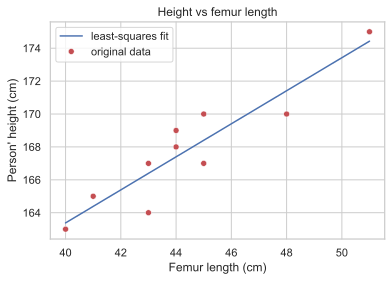

In [25]:
# now plot the regressed line as a function of the input data xi
plt.plot(xi, y_model(xi), label='least-squares fit')
# plot the original data
plt.plot(xi, yi,'ro', label='original data')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()

### Polyfit

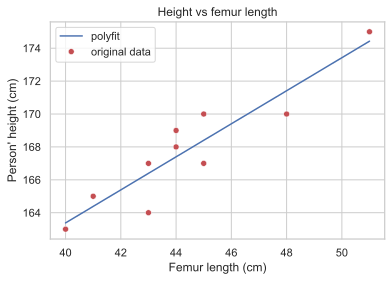

In [38]:
coefs = np.polyfit(xi, yi, 1)

# now plot the regressed line as a function of the input data xi
plt.plot(xi, np.polyval(coefs, xi), label='polyfit')
# plot the original data
plt.plot(xi, yi,'ro', label='original data')
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()

## Standard Deviation

The standard deviation of the sample quantifies the spread of the data around the mean. It is given by
\begin{equation}
S_{y} = \sqrt{\frac{S_t}{n-1}} = \sqrt{\frac{\sum{(y_i - \bar{y})^2}}{n-1}}
\end{equation}
where $\bar{y} = \sum\frac{y_i}{n}$

In [26]:
ybar = yi/N
St = sum((yi-ybar)**2)
Sy = np.sqrt(St/(N-1))
print(Sy, 'cm')

159.2200364275803 cm


## Standard Error

The standard error of the model quantifies the spread of the data around the regression curve. It is given by
\begin{equation}
S_{y/x} = \sqrt{\frac{S_r}{n-2}} = \sqrt{\frac{\sum{(y_i - f_i)^2}}{n-2}}
\end{equation}

In [28]:
fi = a1*xi + a0
Sr = sum((yi - fi)**2)
Syx = np.sqrt(Sr/(N-2))
print(Syx, 'cm')

1.4317065166379392 cm


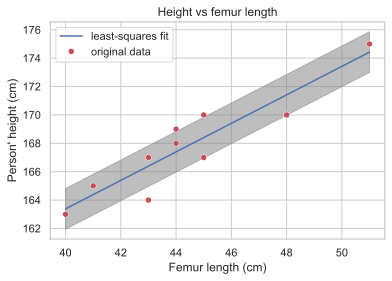

In [34]:
# now plot the regressed line as a function of the input data xi
plt.plot(xi, y_model(xi), label='least-squares fit')
# plot the original data
plt.plot(xi, yi,'ro', label='original data')
plt.plot(xi,y_model(xi)+Syx,'tab:gray', alpha=0)
plt.plot(xi,y_model(xi)-Syx,'tab:gray', alpha=0)
plt.fill_between(xi, y_model(xi)+Syx, y_model(xi)-Syx, color='tab:gray', alpha=.5)
plt.xlabel('Femur length (cm)')
plt.ylabel('Person\' height (cm)')
plt.title('Height vs femur length')
plt.legend()

### R2 Value

The $R^2$ value can be computed as:
\begin{equation}R^2 = 1 - \frac{\sum{(y_i - f_i)^2}}{\sum{(y_i - \bar{y})^2}}\end{equation}
where
\begin{equation}
\bar{y} = \frac{1}{N}\sum{y_i}
\end{equation}

In [29]:
ybar = sum(yi)/N
fi = a1*xi + a0
rsq = 1-sum((yi-fi)**2)/sum((yi-ybar)**2)
print(rsq)

0.8503807627895225
